In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import natsort
import GrowthAssayPlotlib

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
ga1_file = 'GA1 parasitemia.xlsx'
column_title_row = 3
OUTPUT_FOLDER = ''

df1 = GrowthAssayPlotlib.load_file(ga1_file, column_title_row)
df1_melted_replicas = GrowthAssayPlotlib.melt_df(df1, id_vars=['Plate number', 'Well position', 'Line', 'Clone', 'Strain', 'Speed'])

df1_melted_replicas.head()


Loading GA1 parasitemia.xlsx
['Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14', 'Day 15', 'Day 16', 'Day 17']
Repeat 1 = Day 3 / Day 2, Parasitemia 1 = Day 2
Repeat 2 = Day 5 / Day 4, Parasitemia 2 = Day 4
Repeat 3 = Day 7 / Day 6, Parasitemia 3 = Day 6
Repeat 4 = Day 9 / Day 8, Parasitemia 4 = Day 8
Repeat 5 = Day 11 / Day 10, Parasitemia 5 = Day 10
Repeat 6 = Day 13 / Day 12, Parasitemia 6 = Day 12
Repeat 7 = Day 15 / Day 14, Parasitemia 7 = Day 14
Repeat 8 = Day 17 / Day 16, Parasitemia 8 = Day 16


,Plate number,Well position,Line,Clone,Strain,Speed,Repeat,Invasion rate,Parasitemia
0,1,A1,Barseq,,Barseq,Static,Repeat 1,5.750000,0.320
1,2,A2,KOEBA140 C3,C3,KOEBA140,Static,Repeat 1,5.447130,0.331
2,3,A3,KORH4 C1,C1,KORH4,Static,Repeat 1,5.203166,0.379
3,4,A4,KOPfs25 C3,C3,KOPfs25,Static,Repeat 1,NaN,0.266
4,5,A5,KOEBA181 C1,C1,KOEBA181,Static,Repeat 1,4.396789,0.436


In [5]:
# plot all 
MAX_INVASION_RATE_PLOT = 10
output_folder_ga1 = GrowthAssayPlotlib.get_output_folder('GA1', OUTPUT_FOLDER)

df1_melted_replicas_filtered = GrowthAssayPlotlib.filter_dataframe(
    df=df1_melted_replicas,
    ignore_repeats=[
        # 'Repeat 1',
    ],
    filter_list_filename='GA1 filtered',
)

# group replicas per repeat
df1_melted = GrowthAssayPlotlib.group_repeats(
    df_melted_replicas_filtered = df1_melted_replicas_filtered,
    group_keys=['Line', 'Speed', 'Repeat', 'Strain', 'Clone'],
)

df1_melted.to_json('GA1_df_melted.json')

# GrowthAssayPlotlib.plot_repeats_for_line(df1_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga1)
# GrowthAssayPlotlib.plot_repeats_for_wells(df1_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga1)
# GrowthAssayPlotlib.plot_parasimetia_vs_invasion_rate(df1_melted_replicas, ['Line', 'Speed'], output_folder=output_folder_ga1)
# for label, df_plot in [('with replicas', df1_melted_replicas), ('averaged replicas', df1_melted)]:
#     GrowthAssayPlotlib.plot_line(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga1)
#     GrowthAssayPlotlib.plot_speed(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga1)

(8, "C6"),
(8, "D2"),
(10, "A8"),
(10, "B11"),
(12, "A5"),
(12, "A8"),
(12, "A10"),
(12, "B8"),
(12, "B10"),
(12, "B11"),
(12, "C2"),
(12, "C4"),
(12, "C5"),
(12, "C6"),
(12, "D3"),
(12, "D4"),
(14, "B2"),
(14, "B11"),
(14, "D8"),
(14, "E1"),
(14, "F4"),
(14, "G7"),
(14, "G8"),
(14, "G10"),
(16, "A3"),
(16, "A4"),
(16, "A5"),
(16, "A8"),
(16, "A9"),
(16, "B1"),
(16, "B2"),
(16, "B3"),
(16, "B6"),
(16, "B8"),
(16, "B10"),
(16, "B11"),
(16, "C1"),
(16, "C4"),
(16, "C5"),
(16, "C6"),
(16, "C9"),
(16, "C11"),
(16, "D2"),
(16, "D4"),
(16, "D8"),
(16, "E5"),
(16, "E8"),
(16, "E12"),
(16, "F3"),
(16, "F4"),
(16, "F8"),
(16, "F10"),
(16, "G2"),
(16, "G11"),
(16, "G12"),
(16, "H1"),
(16, "H5"),


In [6]:
df1_melted_replicas_filtered

,Plate number,Well position,Line,Clone,Strain,Speed,Repeat,Invasion rate,Parasitemia
0,1,A1,Barseq,,Barseq,Static,Repeat 1,5.750000,0.320
1,2,A2,KOEBA140 C3,C3,KOEBA140,Static,Repeat 1,5.447130,0.331
2,3,A3,KORH4 C1,C1,KORH4,Static,Repeat 1,5.203166,0.379
4,5,A5,KOEBA181 C1,C1,KOEBA181,Static,Repeat 1,4.396789,0.436
5,6,A6,KOEBA175 C6,C6,KOEBA175,Static,Repeat 1,10.128814,0.295
...,...,...,...,...,...,...,...,...,...
711,82,G10,KORH2a C1,C1,KORH2a,90-rpm,Repeat 8,5.855305,0.622
715,86,H2,KOPfs25 C1,C1,KOPfs25,90-rpm,Repeat 8,6.222778,0.799
716,87,H3,KOEBA140 C4,C4,KOEBA140,90-rpm,Repeat 8,2.680180,0.666
717,88,H4,KOEBA181 C2,C2,KOEBA181,90-rpm,Repeat 8,5.050100,0.998


90-rpm
Static
90-rpm
Static
90-rpm
Static


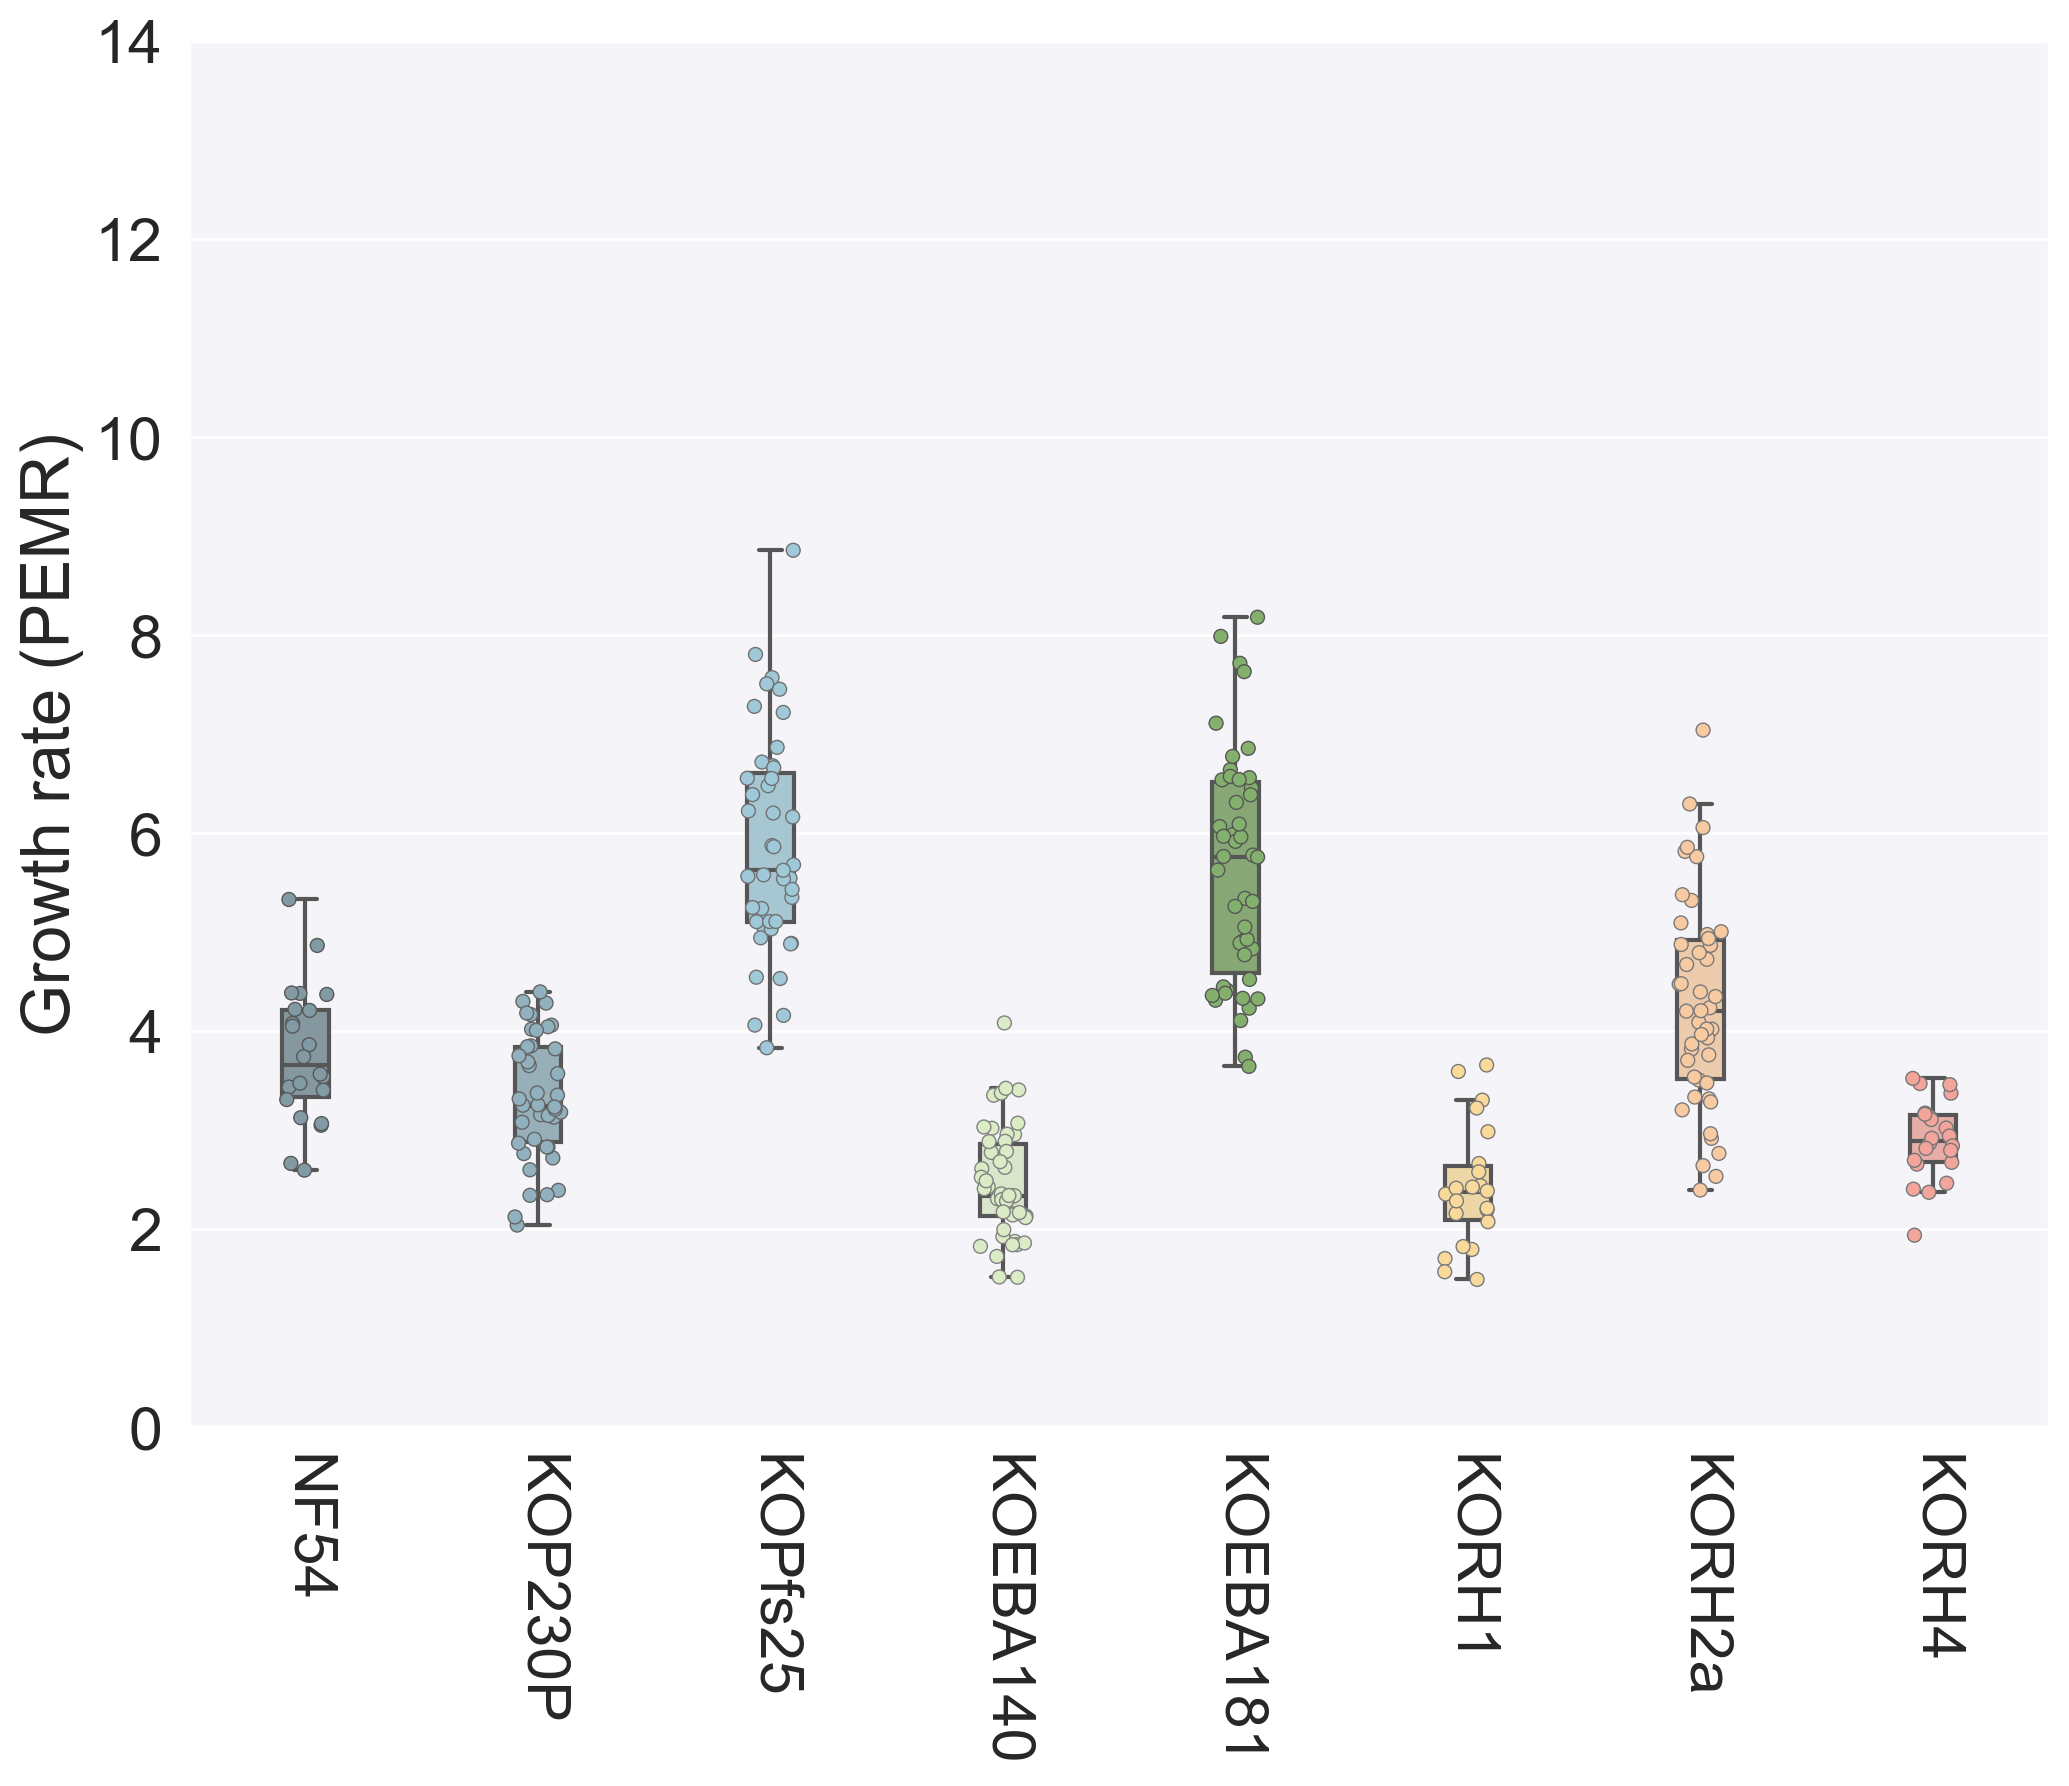

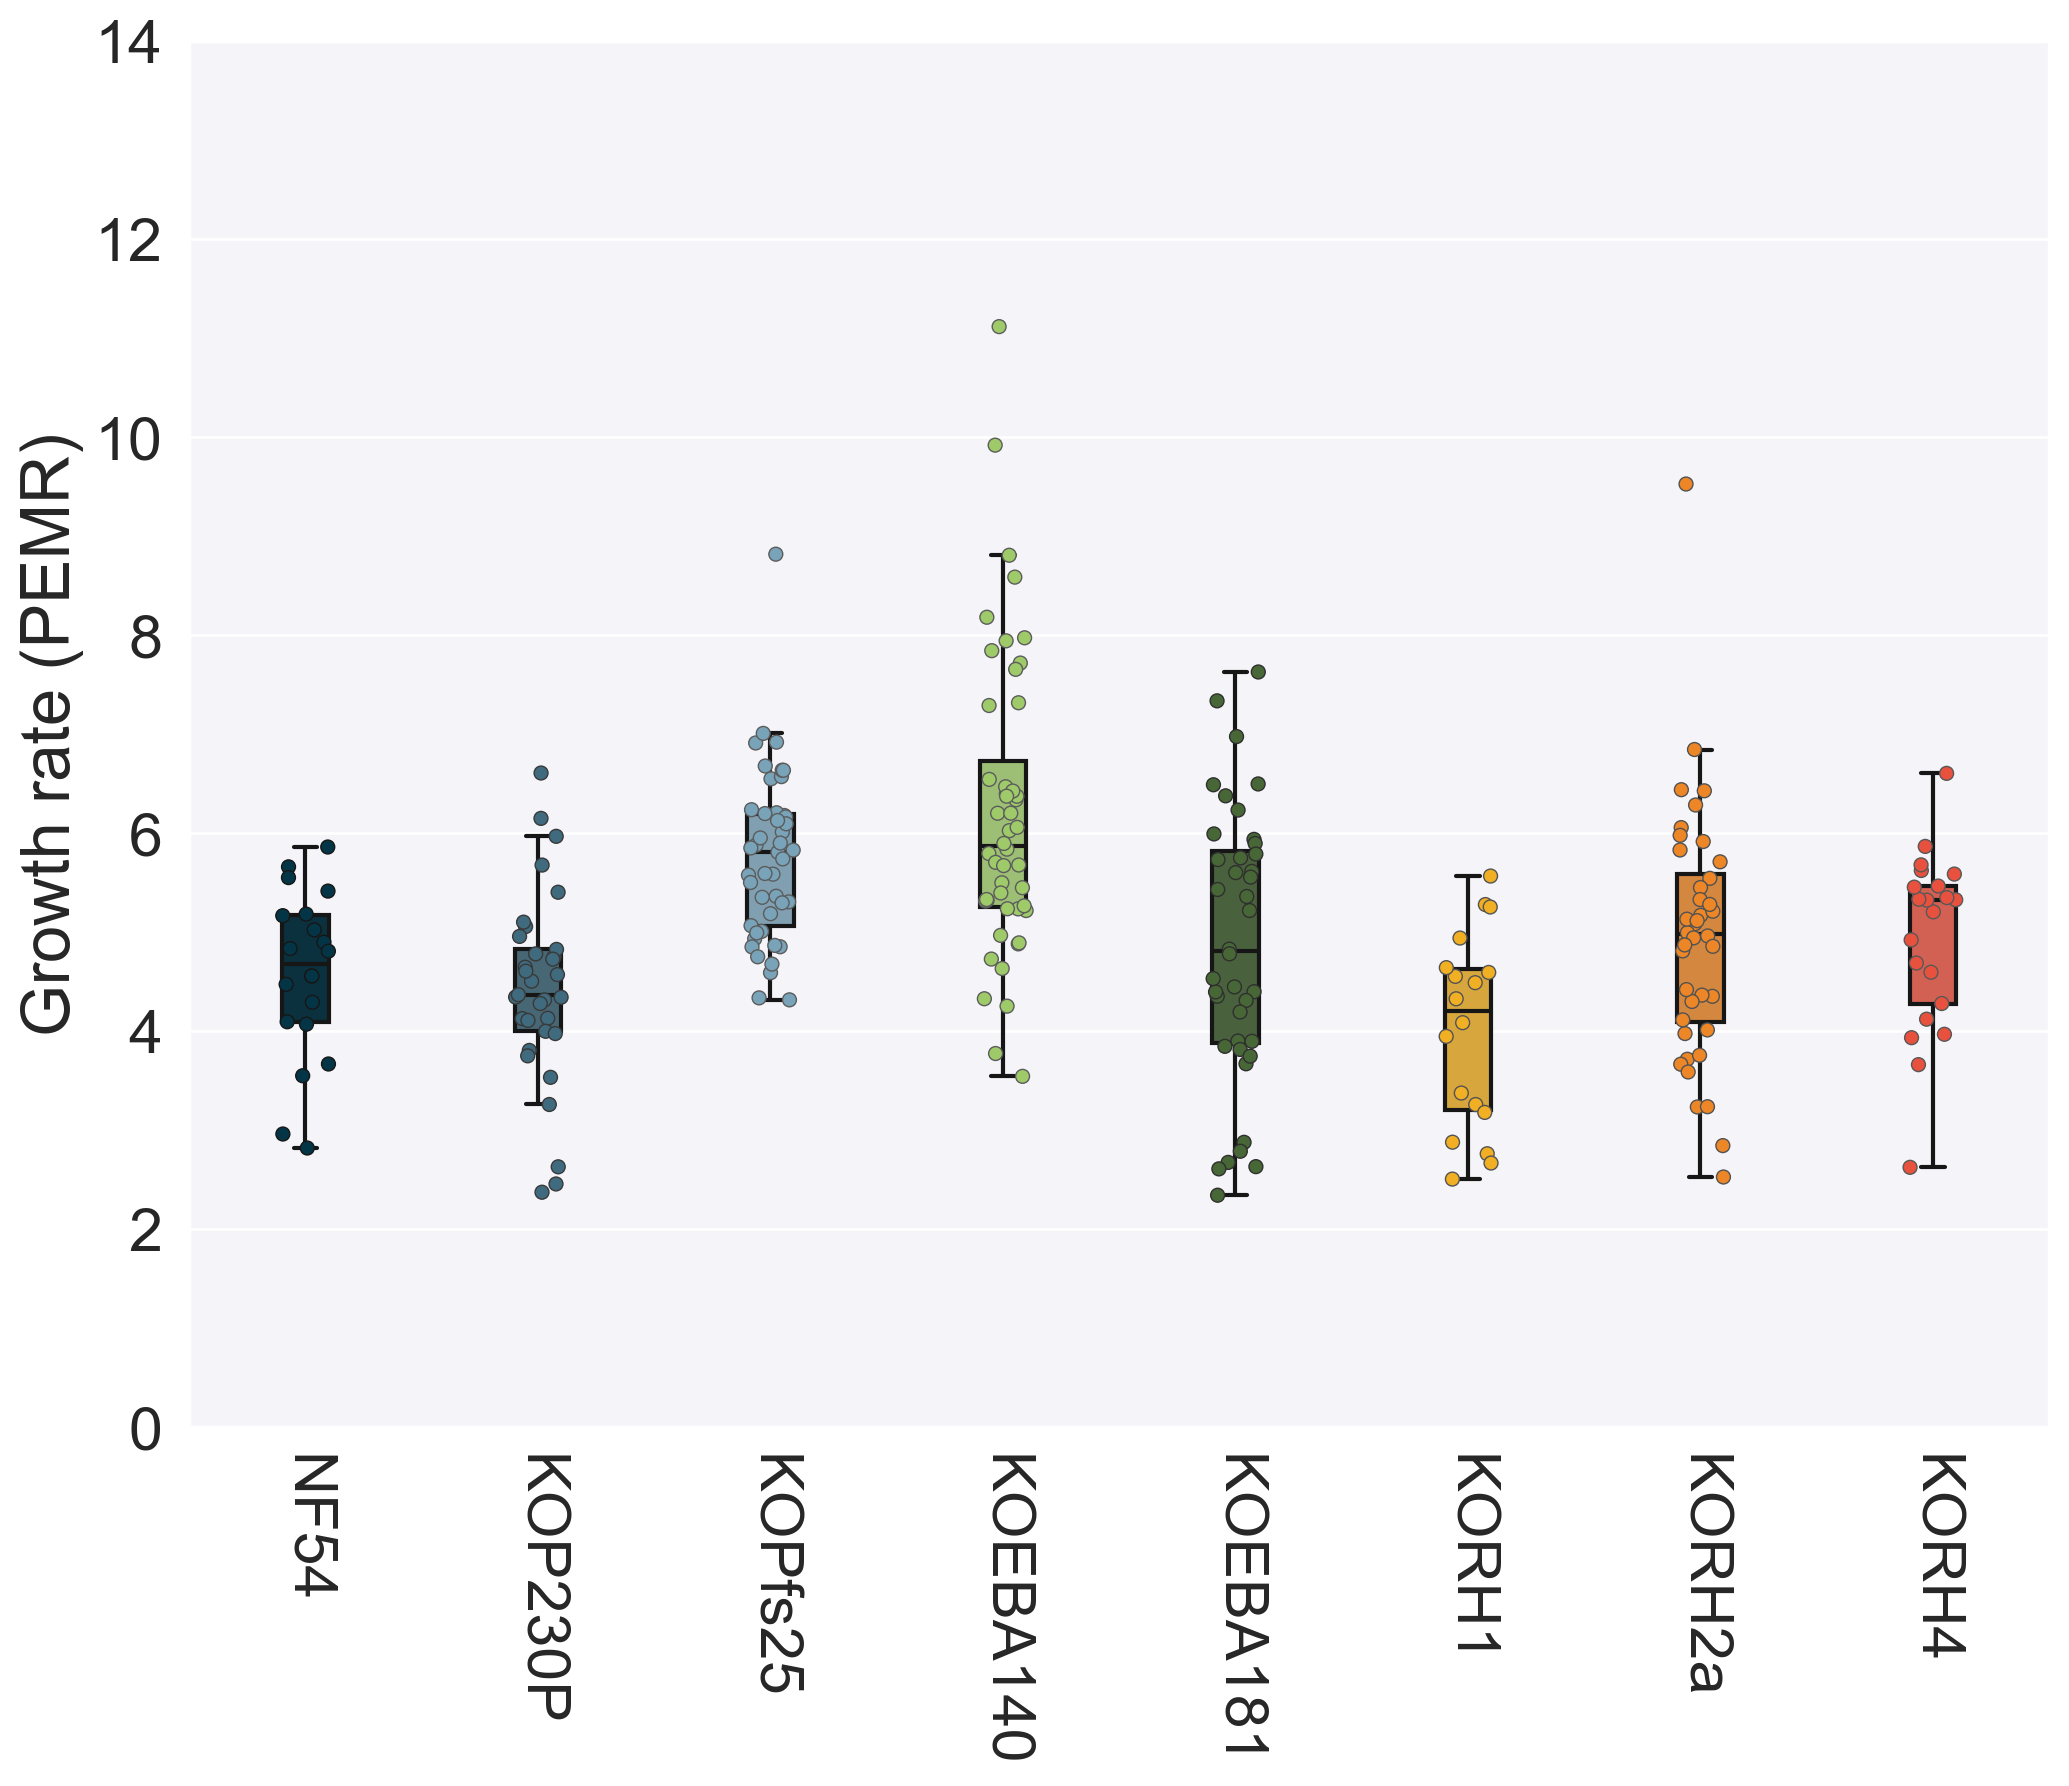

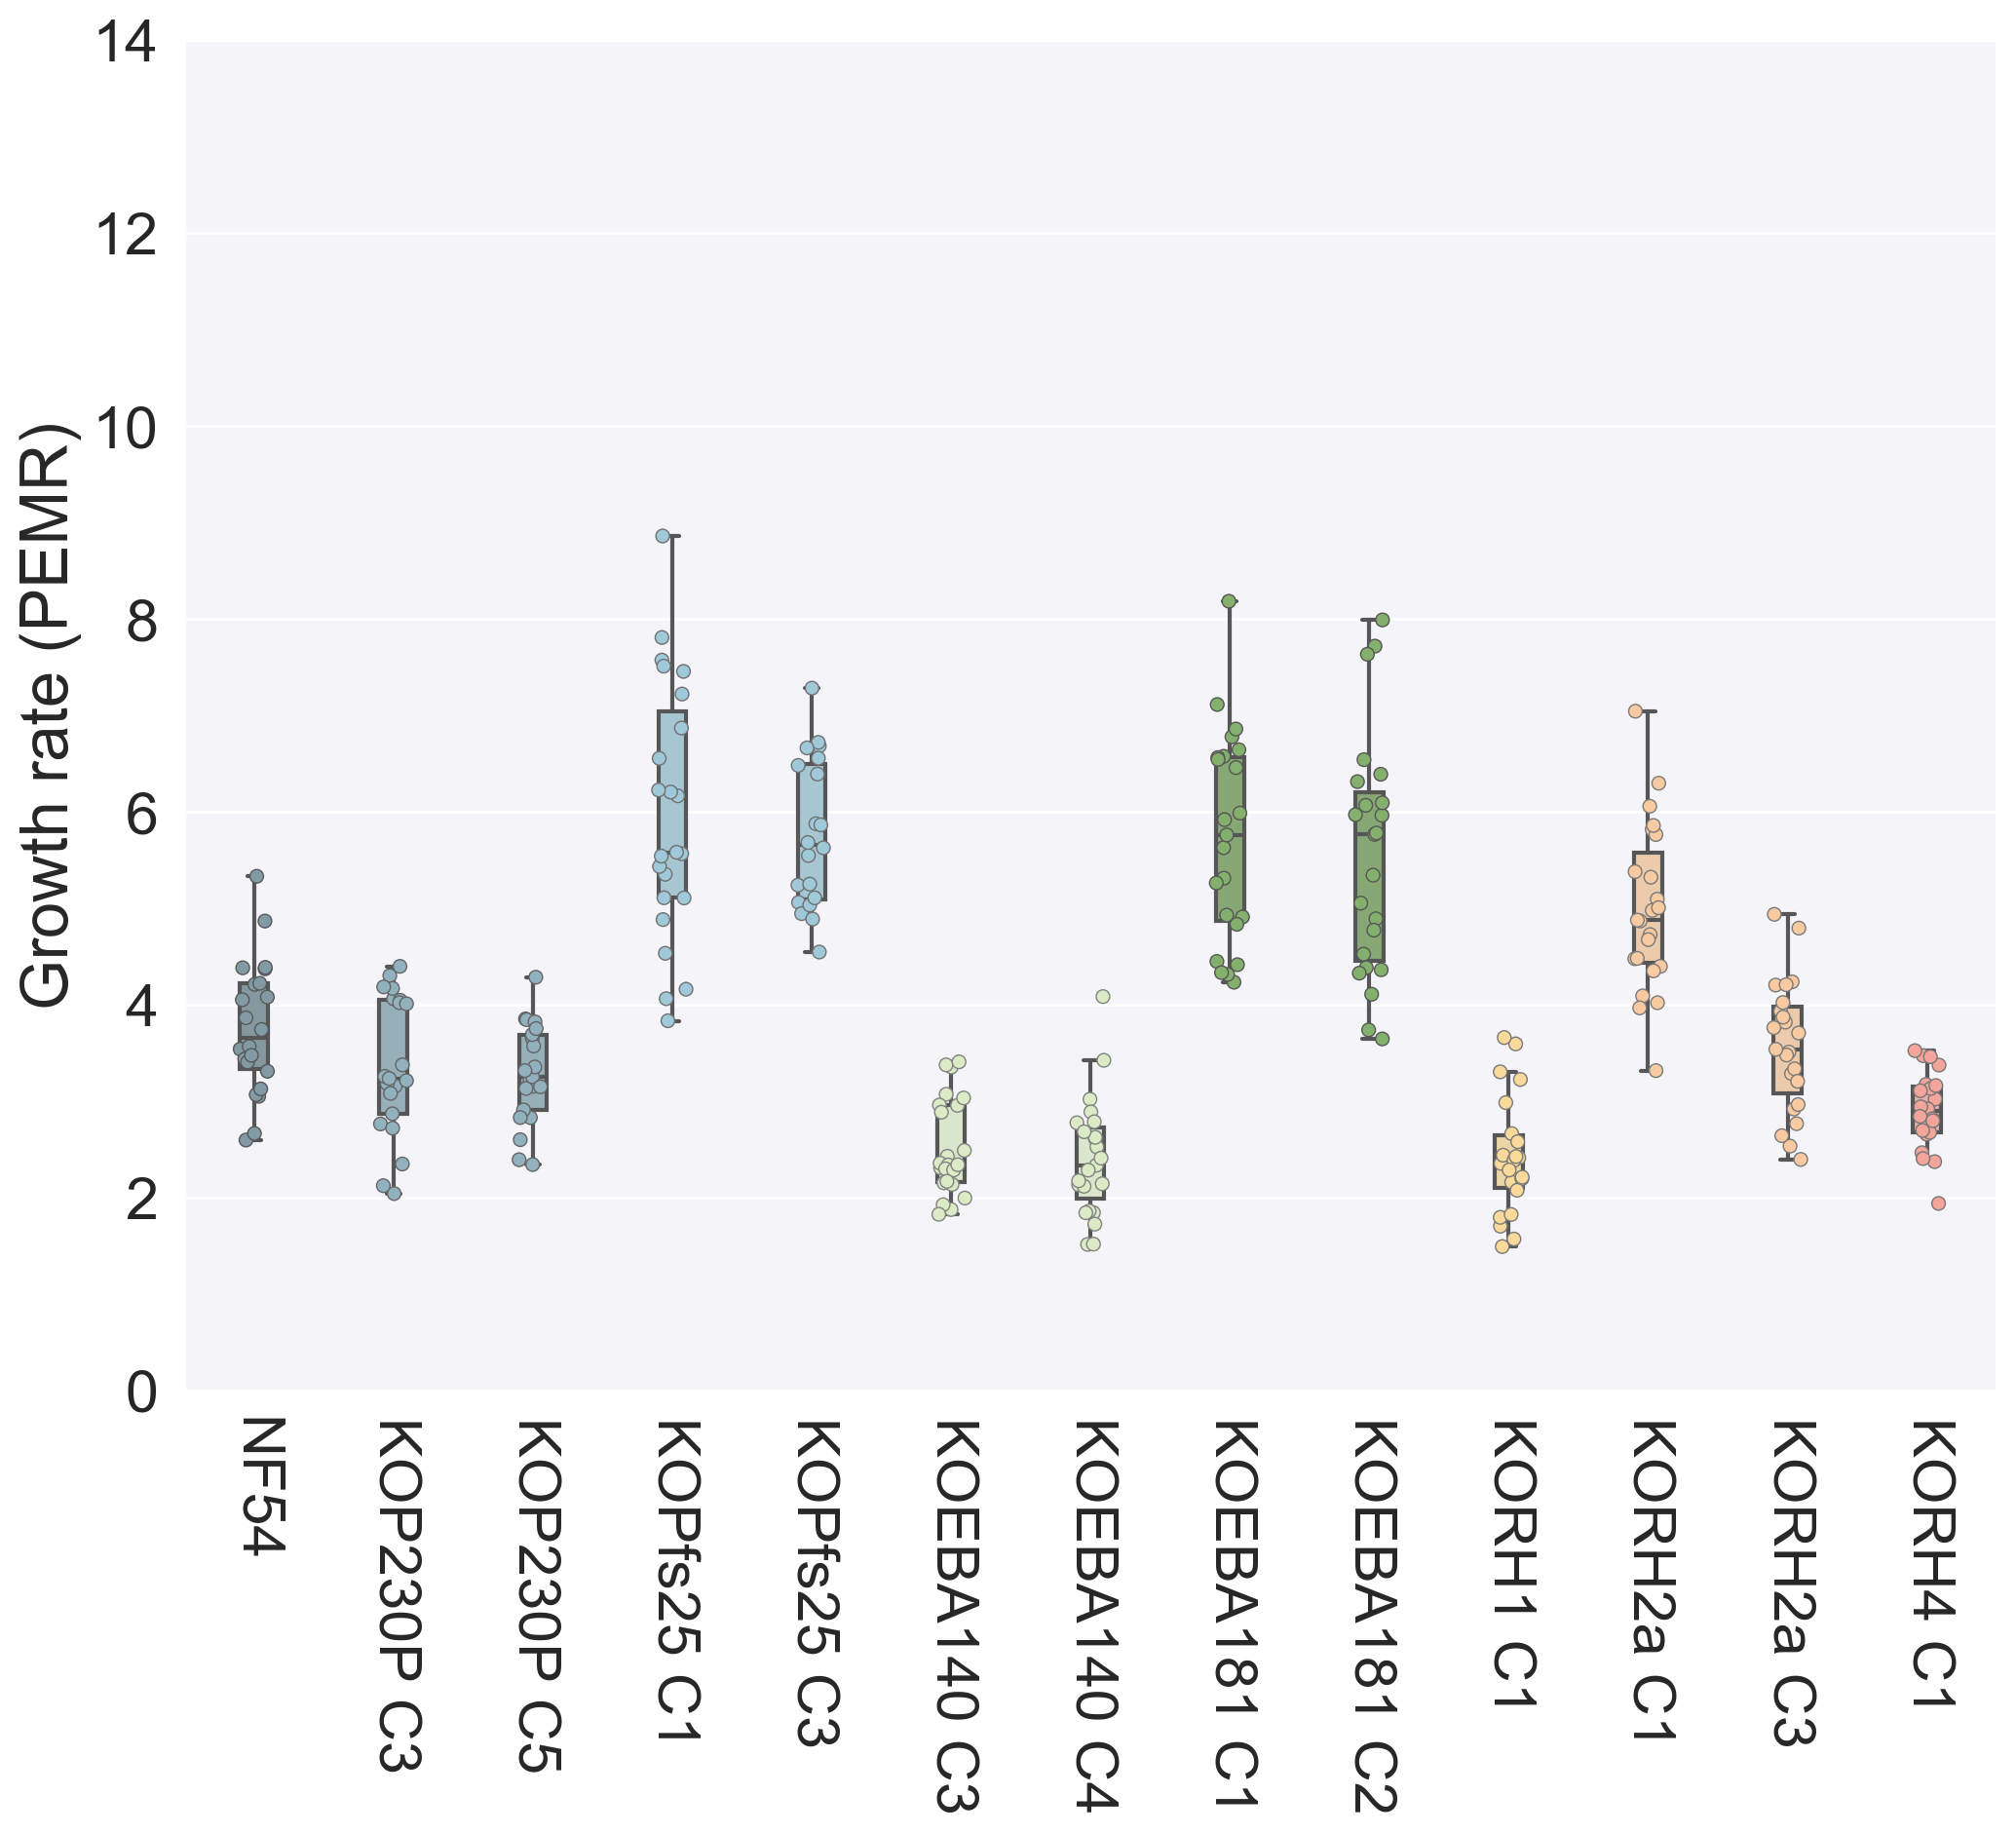

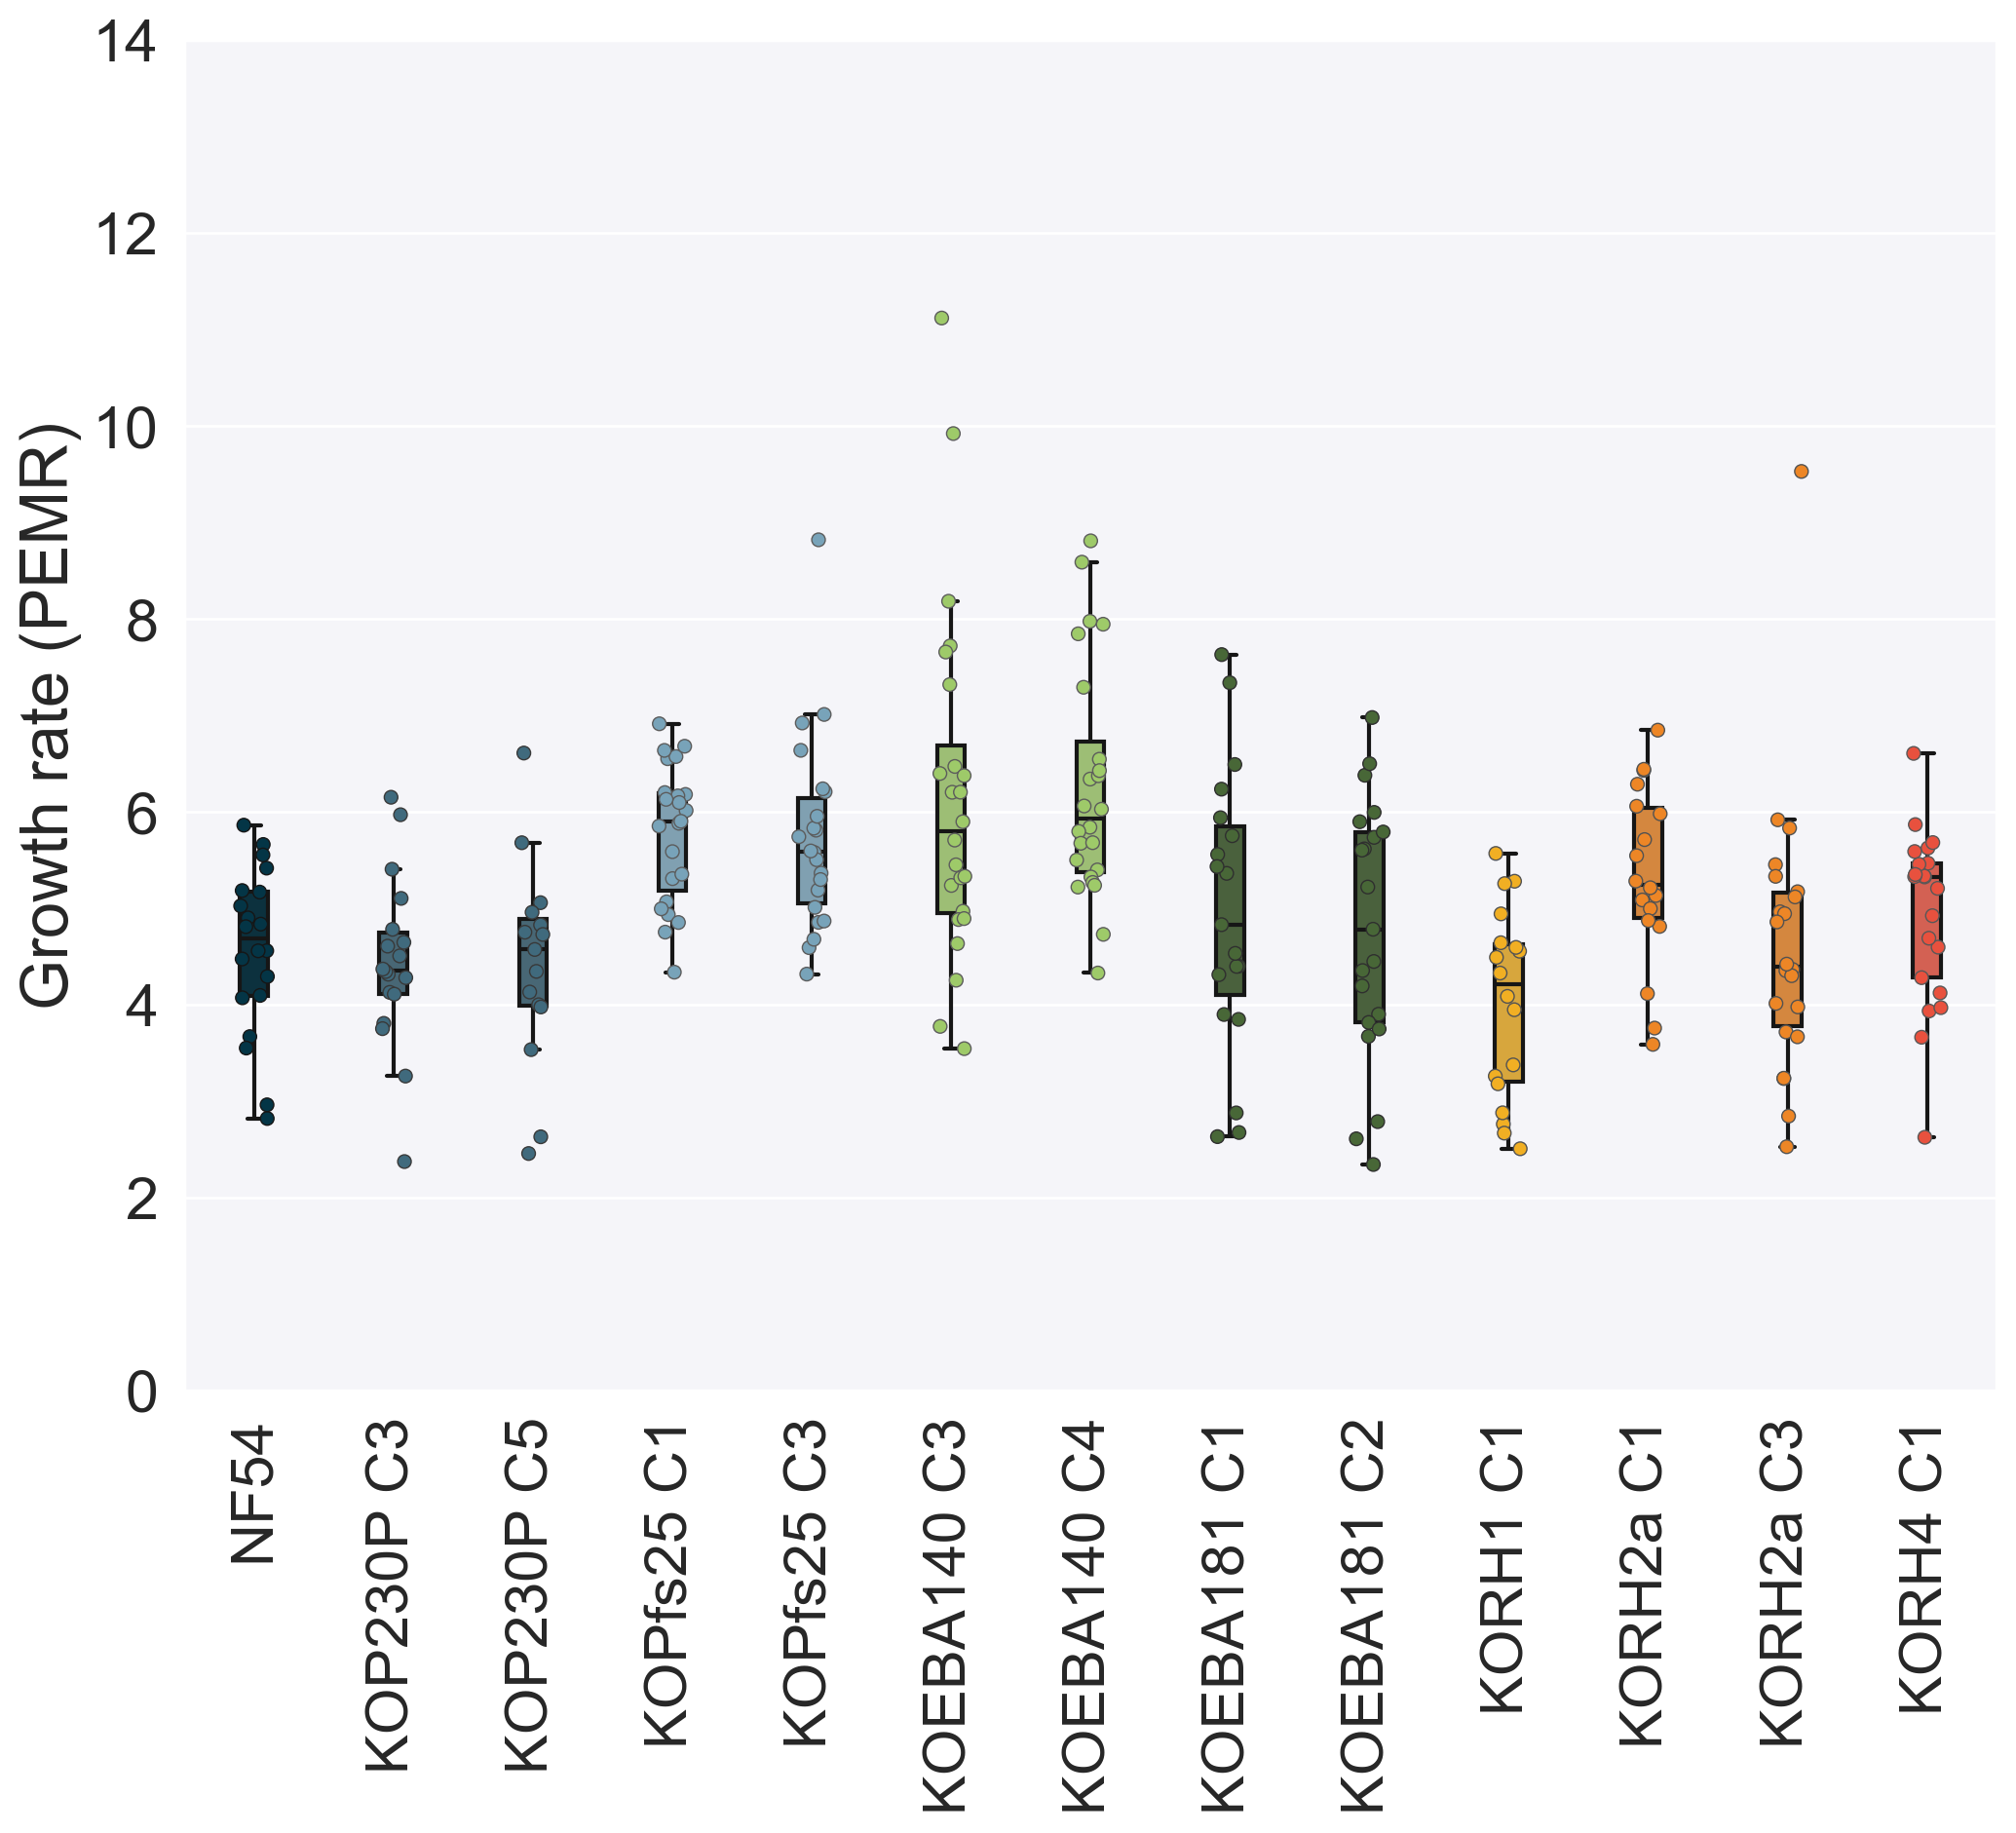

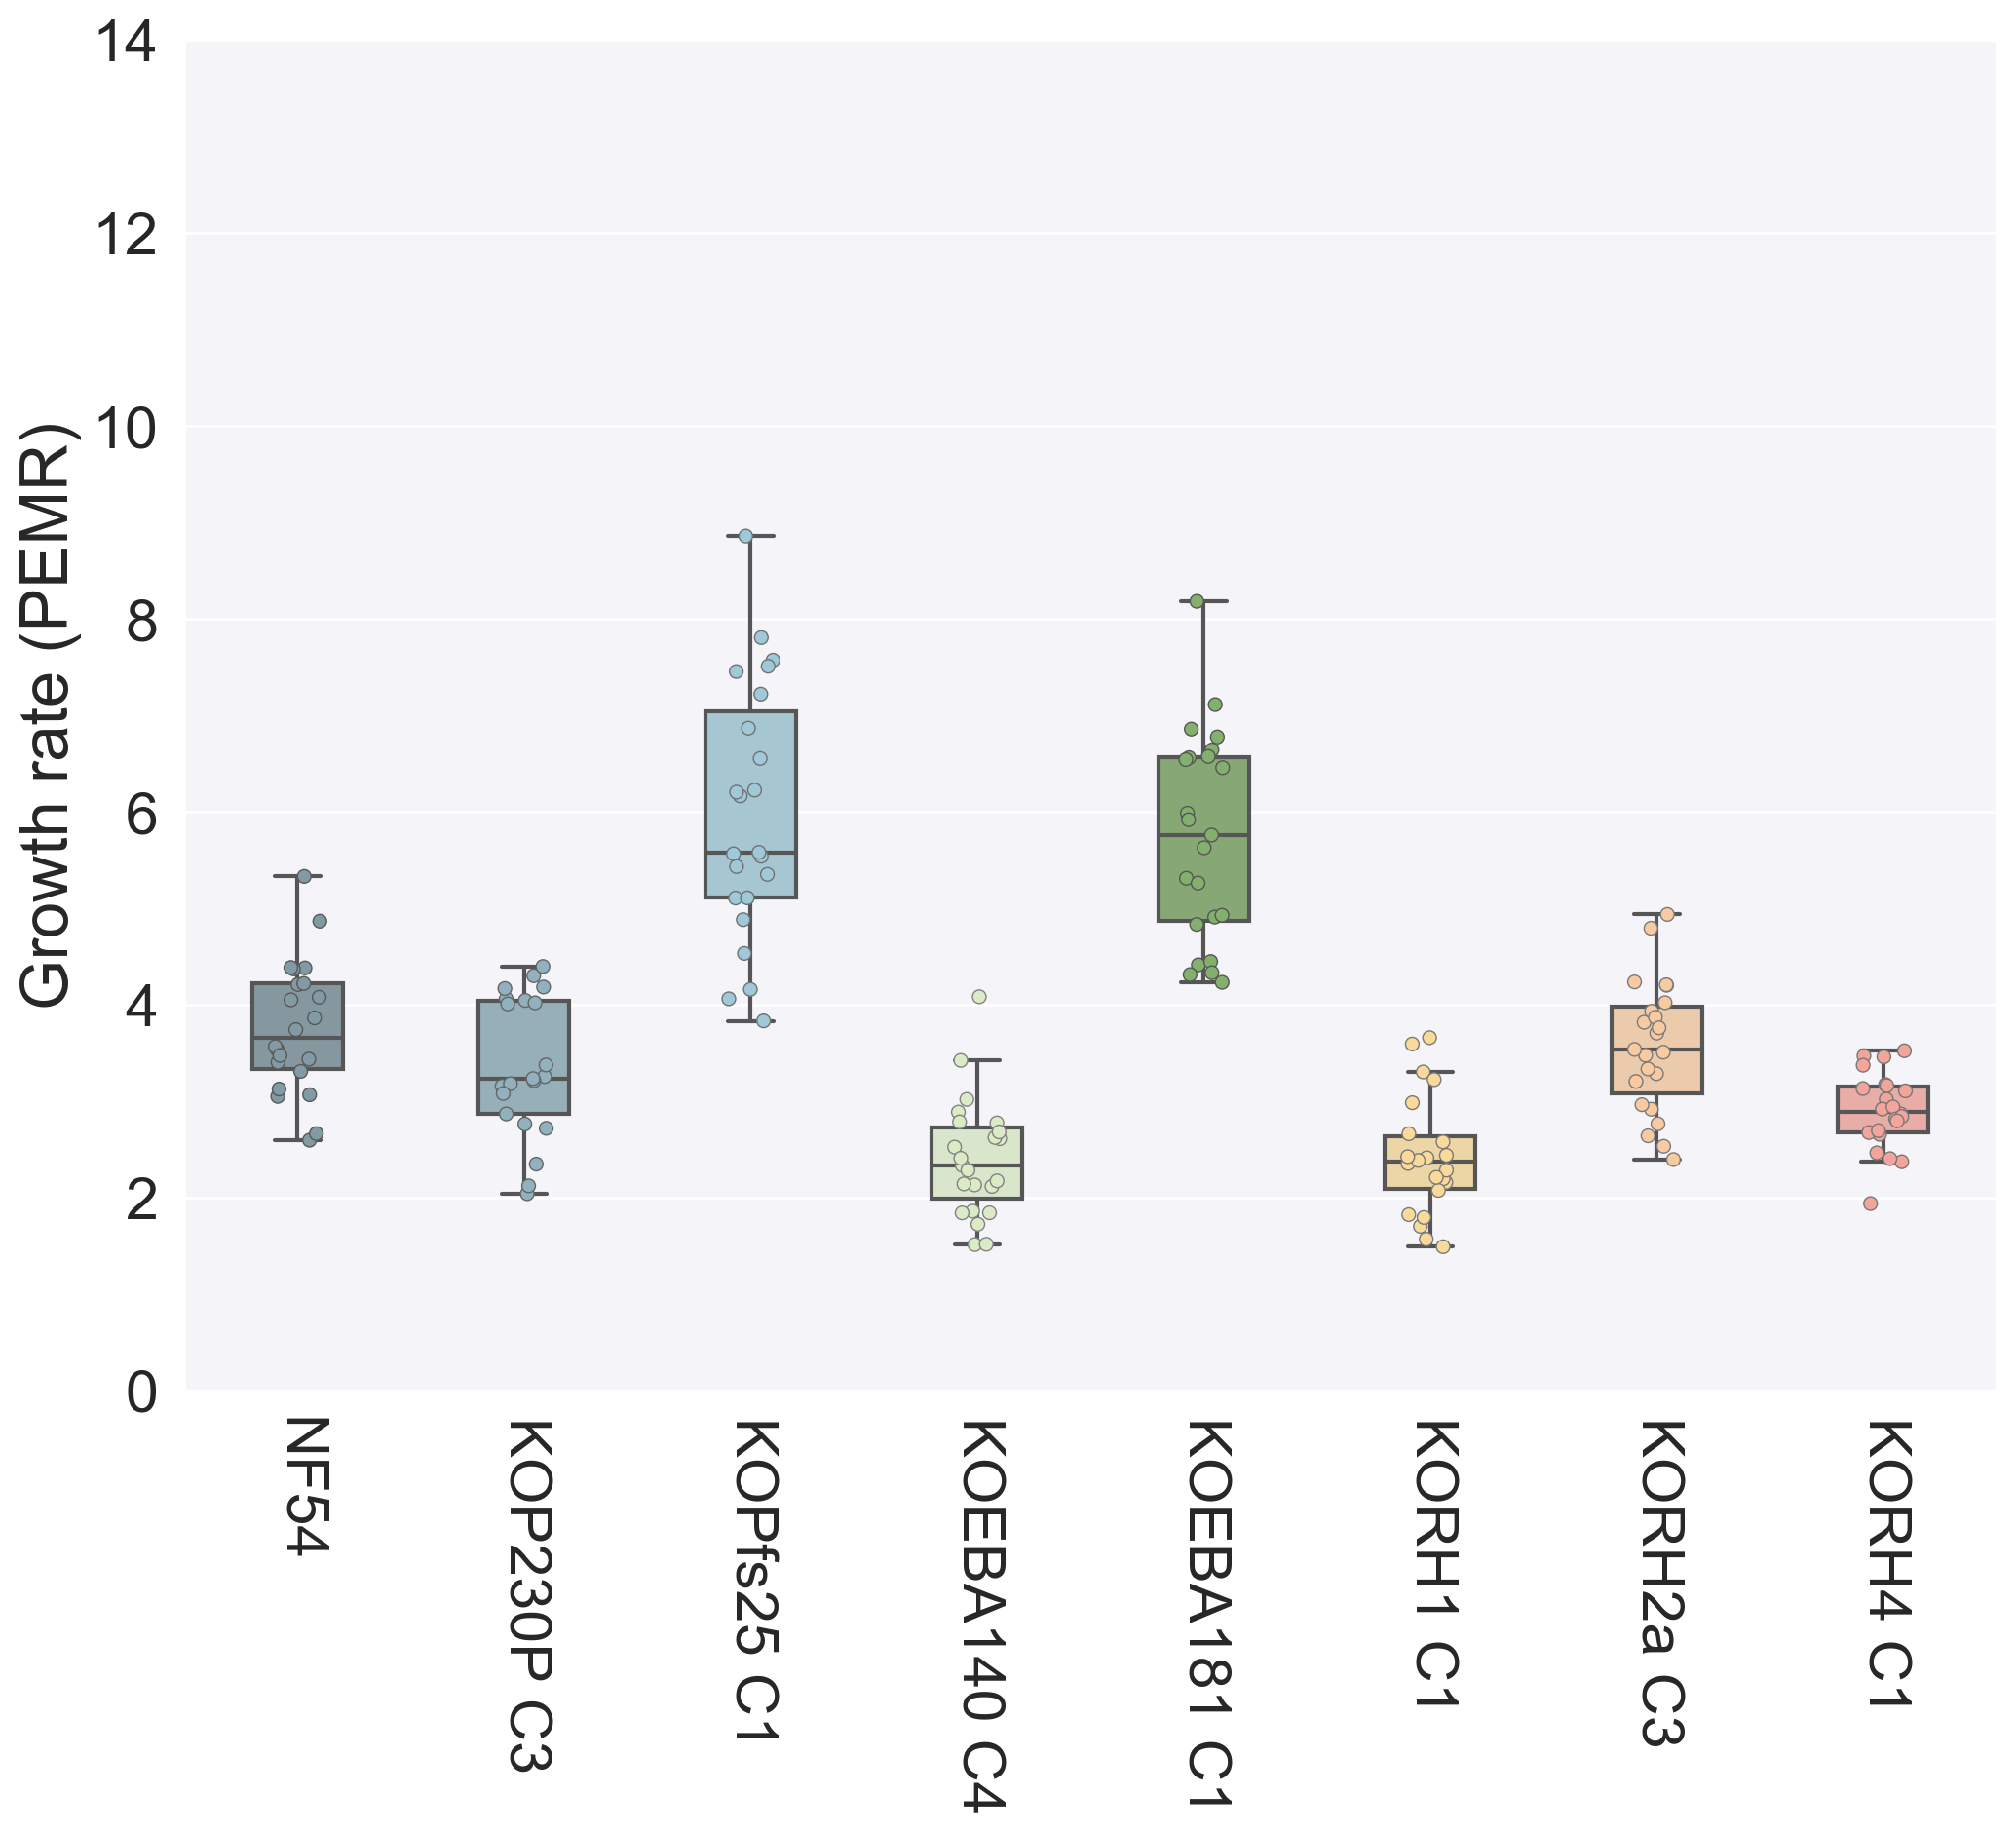

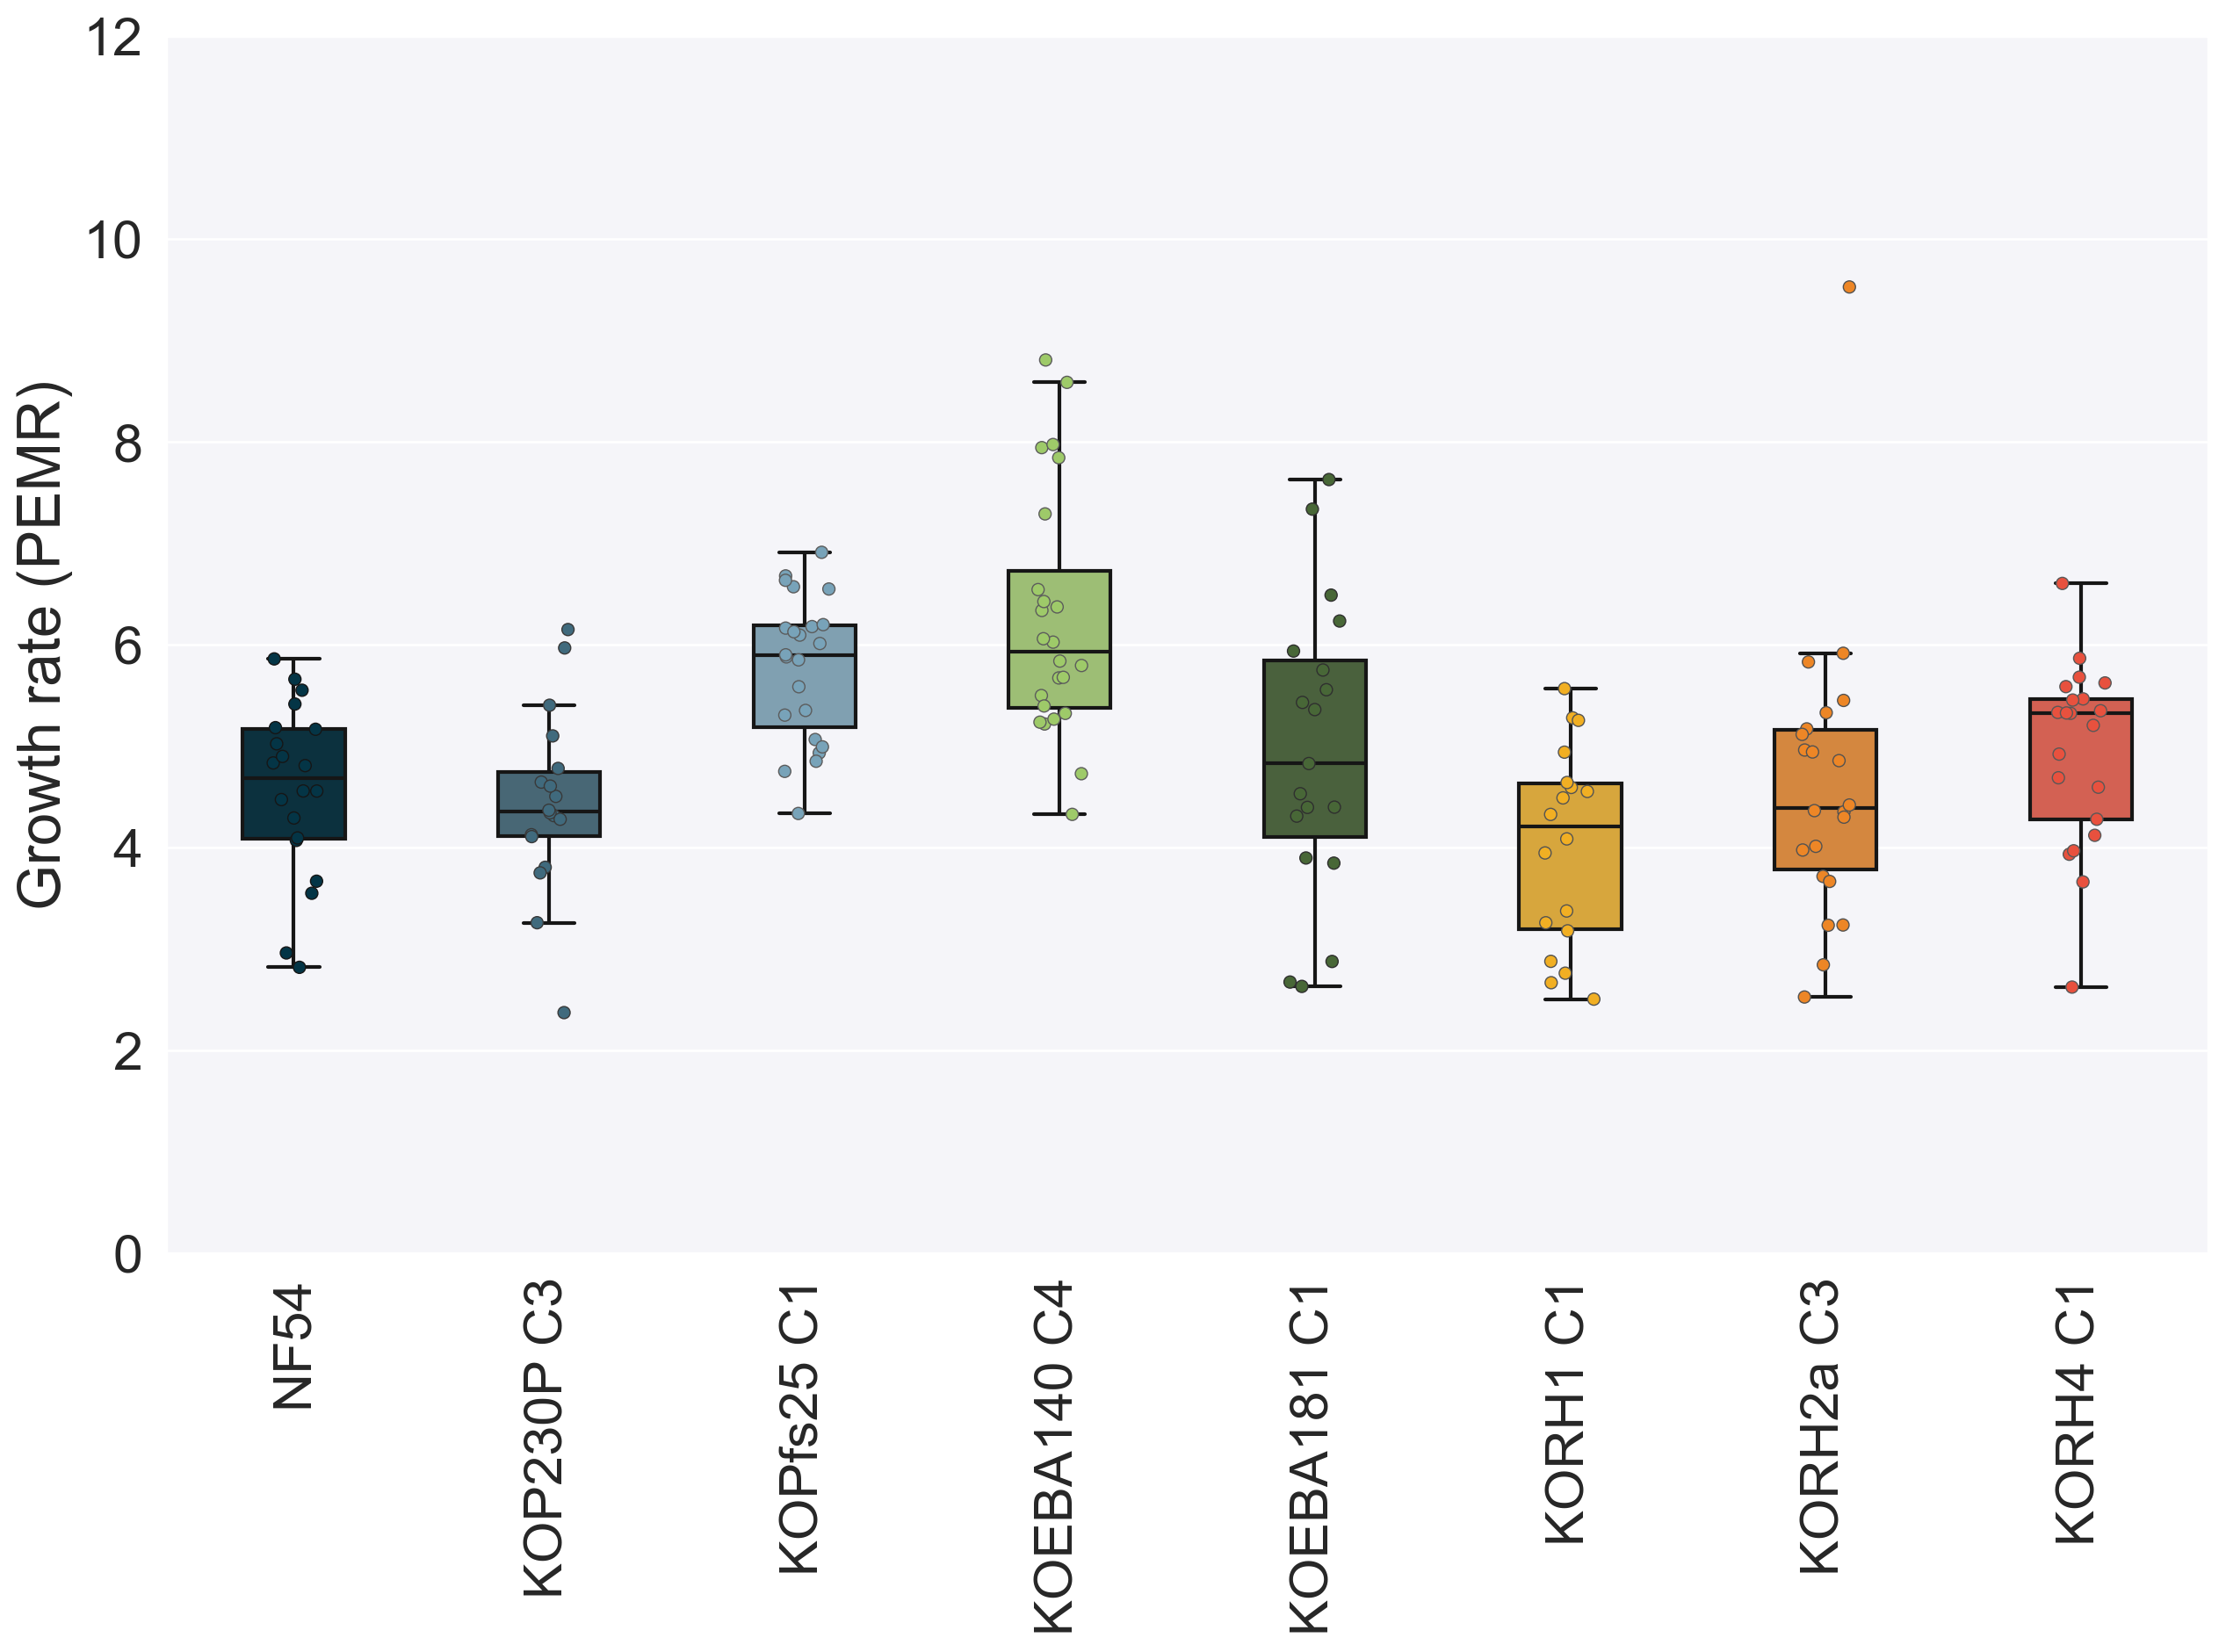

In [7]:

remove_lines = ['KOEBA175', 'Barseq']
df1_melted_q = df1_melted_replicas_filtered.query('Strain != @remove_lines')



GrowthAssayPlotlib.plot_pretty_barplot(
    df=df1_melted_q,
    plot_clones=False, # or 'Line' if you want clones to show separatley
    output_folder=output_folder_ga1,
)
GrowthAssayPlotlib.plot_pretty_barplot(
    df=df1_melted_q,
    plot_clones=True, # or 'Line' if you want clones to show separatley
    output_folder=output_folder_ga1,
)

plt.xticks(rotation=90)

clone_list = [
    'NF54',
    'KOEBA181 C1',
    'KORH4 C1',
    'KOEBA140 C4', 
    'KOEBA175 C6',
    'KORH2a C3',
    'KORH1 C1',
    'KOPfs25 C1',
    'KOP230P C3',
]
dfq = df1_melted_q.query('Line == @clone_list')
GrowthAssayPlotlib.plot_pretty_barplot(
    df=dfq,
    plot_clones=True, # or 'Line' if you want clones to show separatley
    output_folder=output_folder_ga1,
    bar_width=0.4,
)

plt.gcf().set_size_inches(15,9)
plt.xticks(rotation=90)
plt.ylim((0,12))

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(f'Graphs GA1/clones_separate_fig5.svg', bbox_inches='tight')


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'NF54'),
  Text(1, 0, 'KOP230P C3'),
  Text(2, 0, 'KOPfs25 C1'),
  Text(3, 0, 'KOEBA140 C4'),
  Text(4, 0, 'KOEBA181 C1'),
  Text(5, 0, 'KORH1 C1'),
  Text(6, 0, 'KORH2a C3'),
  Text(7, 0, 'KORH4 C1')])

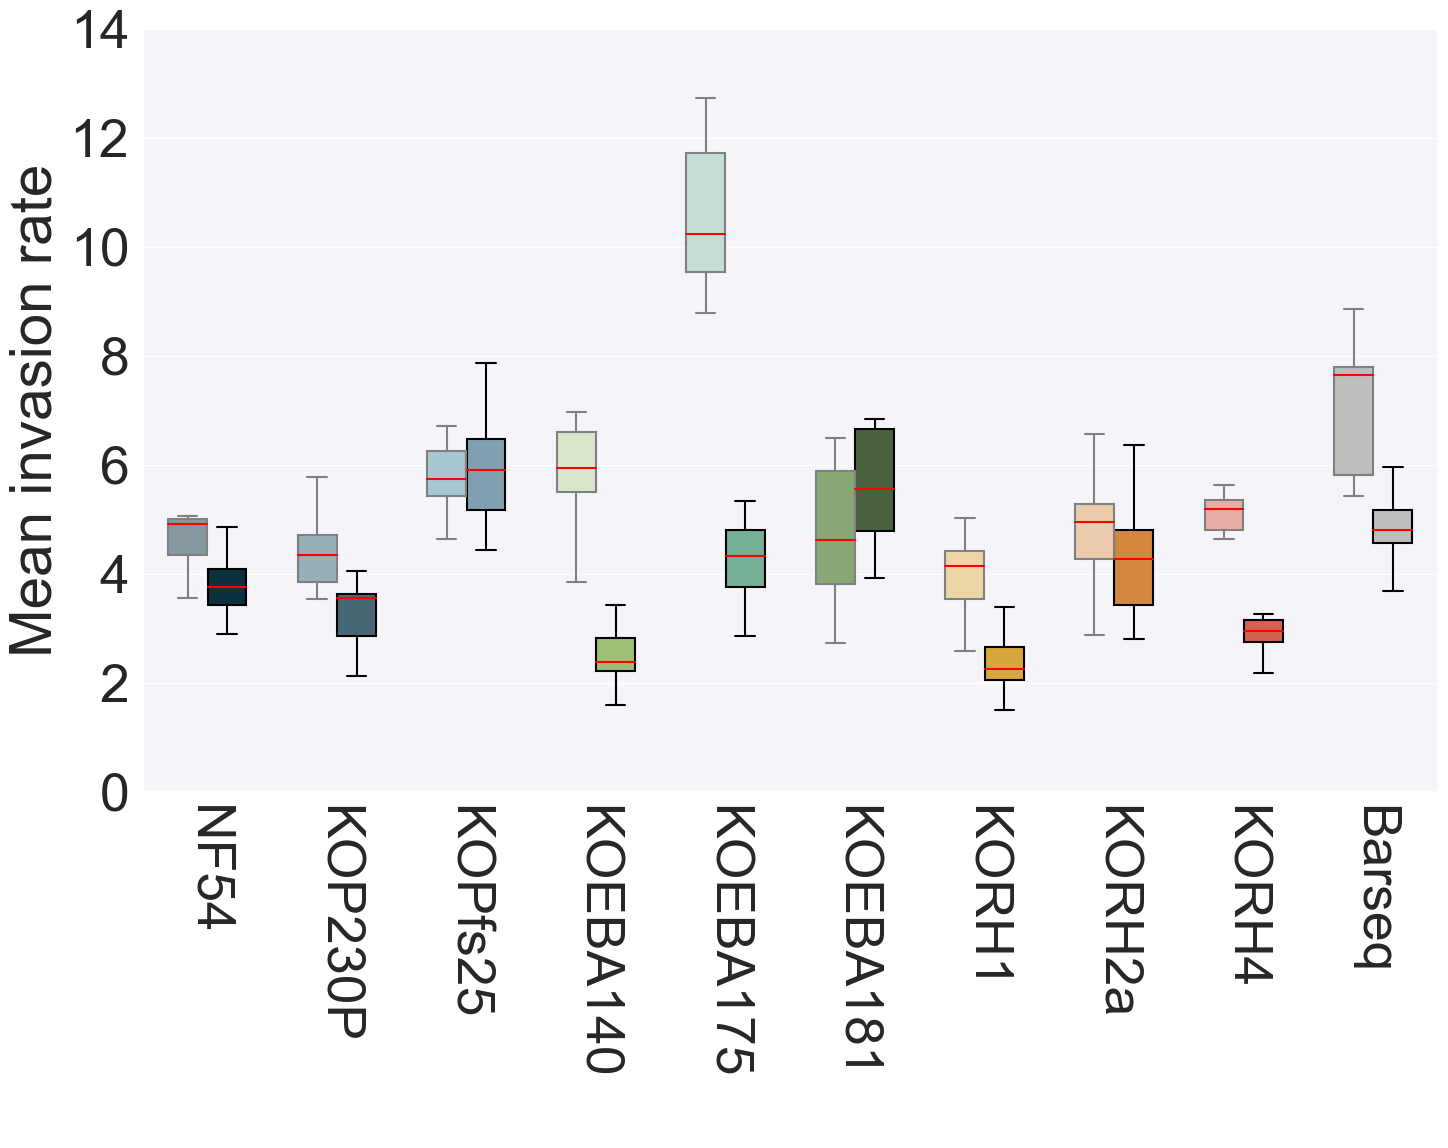

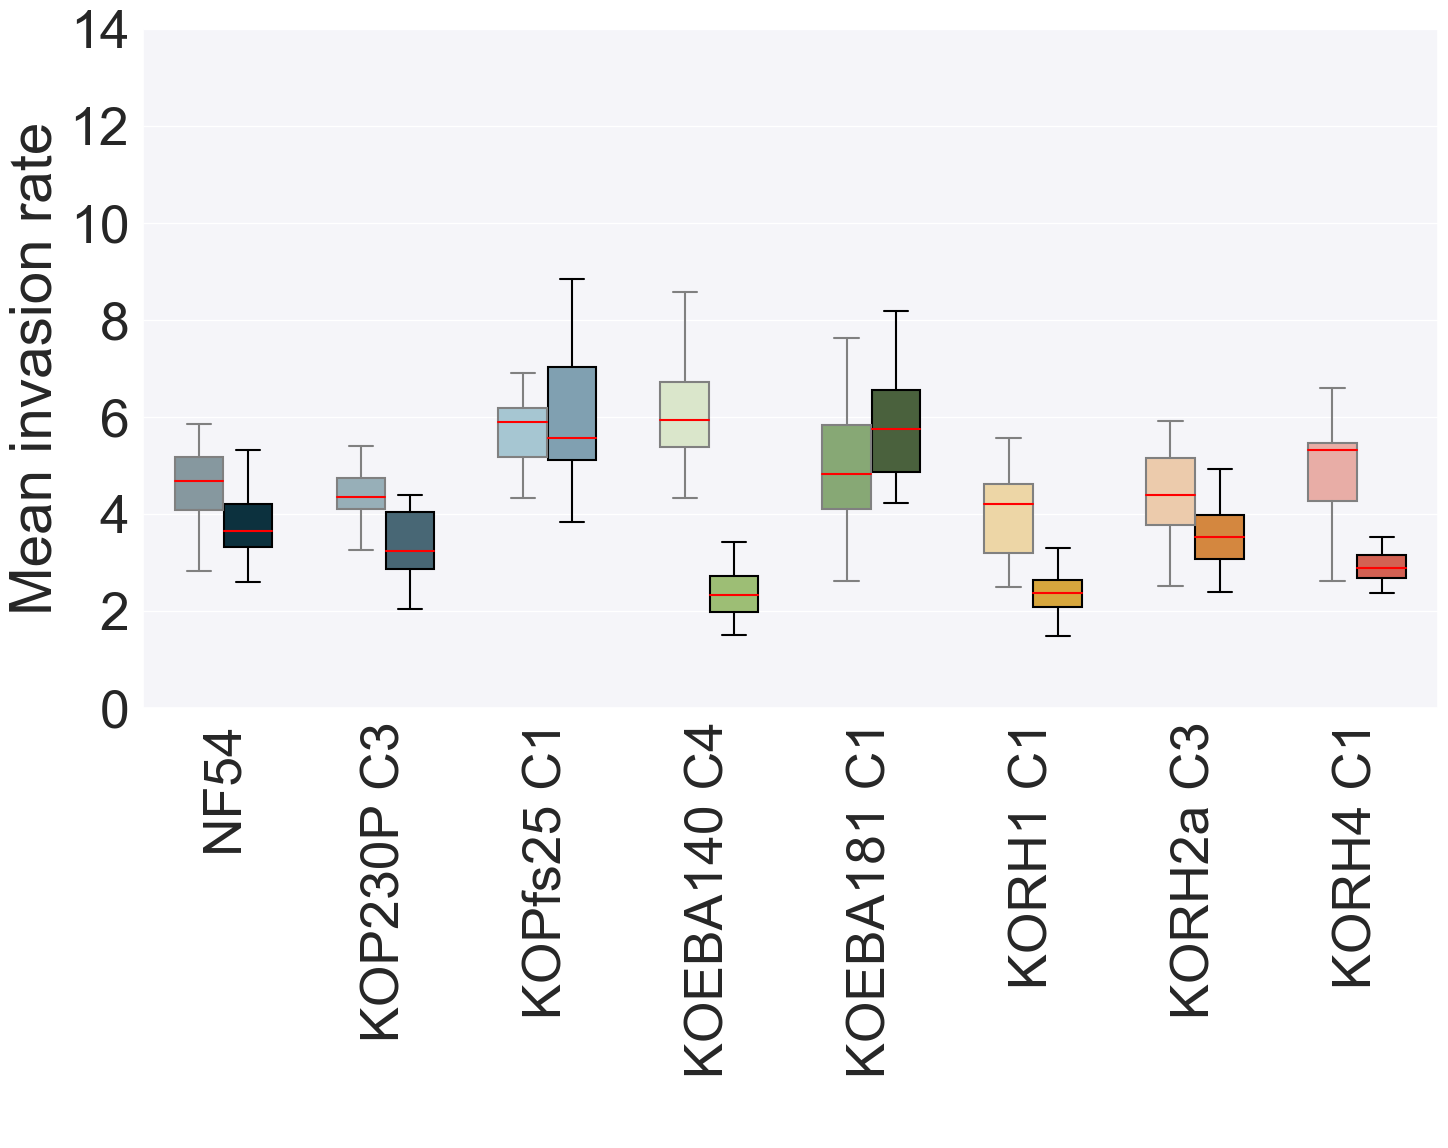

In [8]:
GrowthAssayPlotlib.ga1_plot_together(
    df=df1_melted, 
    plot_clones=False, 
    output_folder=output_folder_ga1,
)
GrowthAssayPlotlib.ga1_plot_together(
    df=dfq, 
    plot_clones=True, 
    output_folder=output_folder_ga1,
)

plt.xticks(rotation=90)

In [9]:
GrowthAssayPlotlib.significance_testing(
    df=df1_melted, 
    group_keys=['Line', 'Speed'],
    wildtype='KOPfs25 C1'
)


Testing Line for 90-rpm.
   - KOPfs25 C1 and Barseq      : ttest p-value = 0.0312, significant
   - KOPfs25 C1 and KOEBA140 C3 : ttest p-value = 0.0000, significant
   - KOPfs25 C1 and KOEBA140 C4 : ttest p-value = 0.0000, significant
   - KOPfs25 C1 and KOEBA175 C6 : ttest p-value = 0.0039, significant
   - KOPfs25 C1 and KOEBA181 C1 : ttest p-value = 0.6237, not
   - KOPfs25 C1 and KOEBA181 C2 : ttest p-value = 0.3784, not
   - KOPfs25 C1 and KOP230P C3  : ttest p-value = 0.0001, significant
   - KOPfs25 C1 and KOP230P C5  : ttest p-value = 0.0000, significant
   - KOPfs25 C1 and KOPfs25 C3  : ttest p-value = 0.6303, not
   - KOPfs25 C1 and KORH1 C1    : ttest p-value = 0.0000, significant
   - KOPfs25 C1 and KORH2a C1   : ttest p-value = 0.0518, not
   - KOPfs25 C1 and KORH2a C3   : ttest p-value = 0.0001, significant
   - KOPfs25 C1 and KORH4 C1    : ttest p-value = 0.0000, significant
   - KOPfs25 C1 and NF54        : ttest p-value = 0.0003, significant
Testing Line for Static.
 

In [10]:
df1_melted

,Line,Speed,Repeat,Strain,Clone,Invasion rate,Parasitemia
0,Barseq,90-rpm,Repeat 1,Barseq,,4.330311,0.282000
1,Barseq,90-rpm,Repeat 2,Barseq,,3.680021,0.205333
2,Barseq,90-rpm,Repeat 3,Barseq,,4.633576,0.492333
3,Barseq,90-rpm,Repeat 4,Barseq,,5.030241,0.519000
4,Barseq,90-rpm,Repeat 5,Barseq,,5.571967,0.594000
...,...,...,...,...,...,...,...
228,NF54,Static,Repeat 4,NF54,,4.993338,0.614500
229,NF54,Static,Repeat 5,NF54,,4.834723,0.518667
230,NF54,Static,Repeat 6,NF54,,5.052540,0.724000
231,NF54,Static,Repeat 7,NF54,,3.147980,0.779333


In [11]:
dfp = df1_melted.groupby(['Line', 'Speed'], as_index=False).agg(
    mean=('Invasion rate', 'mean'),
    std=('Invasion rate', 'std'),
    count=('Invasion rate', 'count'),
)
dfp['ste'] = dfp['std']/np.sqrt(dfp['count'])
dfp

,Line,Speed,mean,std,count,ste
0,Barseq,90-rpm,4.851882,0.705817,8,0.249544
1,Barseq,Static,7.094961,1.292422,8,0.456940
2,KOEBA140 C3,90-rpm,2.538679,0.350390,8,0.123881
3,KOEBA140 C3,Static,6.140842,1.717948,8,0.607386
4,KOEBA140 C4,90-rpm,2.407737,0.551268,8,0.194903
5,KOEBA140 C4,Static,6.255890,1.056628,8,0.373574
6,KOEBA175 C6,90-rpm,4.247814,0.857401,8,0.303137
7,KOEBA175 C6,Static,10.526585,1.473602,8,0.520997
8,KOEBA181 C1,90-rpm,5.707993,1.011736,8,0.357703
9,KOEBA181 C1,Static,4.851020,1.340526,7,0.506671
